In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
#Import Data Transformation Libraries
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
#Machine Learning, Feature Importance and Evaluation Metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from numpy import mean
import pickle


In [2]:
#import the entire data as provided for the project
dl=pd.read_csv('appliancesload.csv')
dl

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1008348,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0
1008349,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0
1008350,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0
1008351,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0


In [3]:
#seperation of the Time column that's attached to dateframe from the source
dl[["Date", "time"]] = dl["Time"].str.split(" ", expand = True)
dl

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date,time
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008349,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008350,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008351,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35


In [4]:
#removing the Time column from the table (no longer necessary)
dm = dl.drop(["Time"], axis=1)
dm

,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date,time
0,695,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
1,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
2,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
3,702,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
4,700,88,0,0,0,0,0,0,0,0,17/09/2013,22:08
...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008349,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008350,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35
1008351,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35


In [5]:
#Process date feature into day and month
#Process time feature into hour and minute
dm[["Hour", "Minute"]] = dm["time"].str.split(":", expand = True)
dm[["Day", "Month", "Year"]] = dm["Date"].str.split("/", expand = True)
dm

,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Date,time,Hour,Minute,Day,Month,Year
0,695,88,0,0,0,0,0,0,0,0,17/09/2013,22:08,22,08,17,09,2013
1,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08,22,08,17,09,2013
2,694,88,0,0,0,0,0,0,0,0,17/09/2013,22:08,22,08,17,09,2013
3,702,88,0,0,0,0,0,0,0,0,17/09/2013,22:08,22,08,17,09,2013
4,700,88,0,0,0,0,0,0,0,0,17/09/2013,22:08,22,08,17,09,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35,00,35,10,04,2014
1008349,115,1,0,0,0,0,0,0,0,0,10/04/2014,00:35,00,35,10,04,2014
1008350,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35,00,35,10,04,2014
1008351,116,1,0,0,0,0,0,0,0,0,10/04/2014,00:35,00,35,10,04,2014


In [6]:
#rearranging the columns for convinience
dn = dm.drop(["time", "Date"], axis=1) #drop off the time and Date column 
dn =dm.reindex(columns = ["Day", "Month","Year","Hour","Minute","Aggregate",	"Fridge-Freezer",	"Washing Machine",	"Dishwasher",	"Television Site",	"Microwave",	"Toaster",	"Hi-Fi",	"Kettle",	"Overhead Fan"])
dn

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17,09,2013,22,08,695,88,0,0,0,0,0,0,0,0
1,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
2,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
3,17,09,2013,22,08,702,88,0,0,0,0,0,0,0,0
4,17,09,2013,22,08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,10,04,2014,00,35,115,1,0,0,0,0,0,0,0,0
1008349,10,04,2014,00,35,115,1,0,0,0,0,0,0,0,0
1008350,10,04,2014,00,35,116,1,0,0,0,0,0,0,0,0
1008351,10,04,2014,00,35,116,1,0,0,0,0,0,0,0,0


In [7]:
#extracting only year 2013 to work with in this project
df=dn[~(dn['Year']=='2014')]
print("DataFrame for the Project")
df

DataFrame for the Project


,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17,09,2013,22,08,695,88,0,0,0,0,0,0,0,0
1,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
2,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
3,17,09,2013,22,08,702,88,0,0,0,0,0,0,0,0
4,17,09,2013,22,08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0


In [8]:
#comfirming that only year 2013 is in the New DataFrame we will check the head and tail of the table
df.head() #check the top of table


,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17,09,2013,22,08,695,88,0,0,0,0,0,0,0,0
1,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
2,17,09,2013,22,08,694,88,0,0,0,0,0,0,0,0
3,17,09,2013,22,08,702,88,0,0,0,0,0,0,0,0
4,17,09,2013,22,08,700,88,0,0,0,0,0,0,0,0


In [9]:
df.tail() #check bottom of table

,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0
487250,26,12,2013,16,08,280,1,18,0,0,0,0,0,0,0


In [10]:
#check for missing values
df.isnull().sum()

Day                0
Month              0
Year               0
Hour               0
Minute             0
Aggregate          0
Fridge-Freezer     0
Washing Machine    0
Dishwasher         0
Television Site    0
Microwave          0
Toaster            0
Hi-Fi              0
Kettle             0
Overhead Fan       0
dtype: int64

In [11]:
#Extract consumption of individual appliances in graphs on monthly basis
#Firstly, let us study how many months of the year were captured in the dataset
df.Month.unique()

array(['09', '10', '12'], dtype=object)

In [12]:
#only three different months were captured, and in object type
#we first convert to integers
df['Month']=df['Month'].astype('int')

#and then assign each integer to corresponding month name (month)
def month(Month):
    if Month in [9]:
        month = 'September'
    elif Month in [10]:
        month = 'October'
    else:
        month = 'December'
    return month
#replace the Month column with month names (month)
df['month']=df['Month'].apply(month)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_10504\2374582621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['Month'].astype('int')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10504\2374582621.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['Month'].apply(month)


,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month
0,17,9,2013,22,08,695,88,0,0,0,0,0,0,0,0,September
1,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September
2,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September
3,17,9,2013,22,08,702,88,0,0,0,0,0,0,0,0,September
4,17,9,2013,22,08,700,88,0,0,0,0,0,0,0,0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0,December
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0,December
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0,December
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0,December


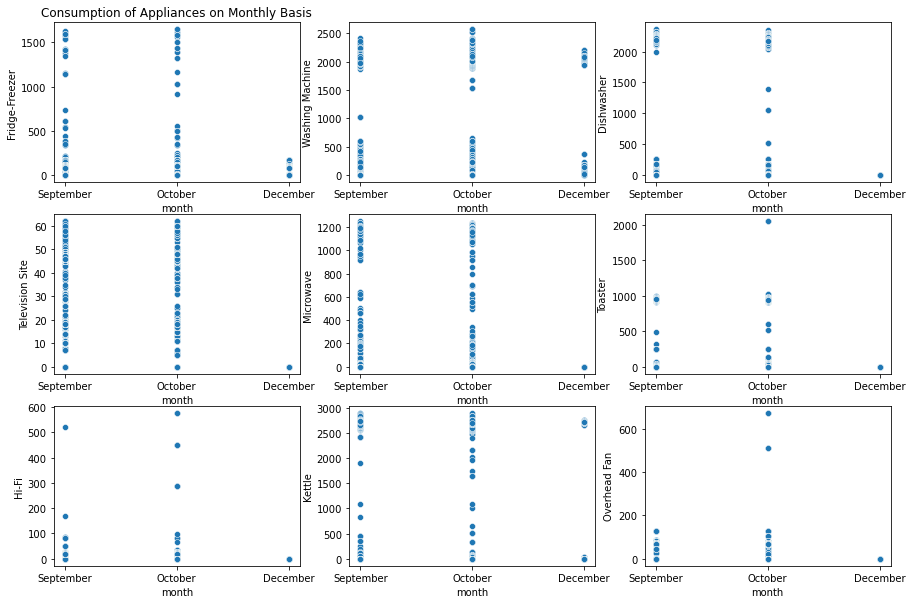

In [14]:
#Let us now represent consumption of appliances on monthly basis in graphical format

plt.figure(figsize = (15,10)) #size of plot
plt.subplot(3,3,1) #positioning subplots
sns.scatterplot(x=df['month'], y=df['Fridge-Freezer'])
plt.title("Consumption of Appliances on Monthly Basis")
plt.subplot(3,3,2)
sns.scatterplot(x=df['month'], y=df['Washing Machine'])
plt.subplot(3,3,3)
sns.scatterplot(x=df['month'], y=df['Dishwasher'])
plt.subplot(3,3,4)
sns.scatterplot(x=df['month'], y=df['Television Site'])
plt.subplot(3,3,5)
sns.scatterplot(x=df['month'], y=df['Microwave'])
plt.subplot(3,3,6)
sns.scatterplot(x=df['month'], y=df['Toaster'])
plt.subplot(3,3,7)
sns.scatterplot(x=df['month'], y=df['Hi-Fi'])
plt.subplot(3,3,8)
sns.scatterplot(x=df['month'], y=df['Kettle'])
plt.subplot(3,3,9)
sns.scatterplot(x=df['month'], y=df['Overhead Fan'])
plt.show()

In [15]:
#Explore time-of-use of appliances at different hours of the day
#Firstly, let us study how many hours of the day were captured in the dataset
df.Hour.unique()

array(['22', '23', '00', '01', '02', '03', '04', '05', '06', '07', '08',
       '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21'], dtype=object)

In [16]:
#All 24 hours were captured, and in object type
#we first convert to integers
df['Hour']=df['Hour'].astype('int')
#and further group the hours to period of the day (Morning, Afternoon, Evening and Night)
#Morning - 5:00 to 11:59, Afternoon - 12:00 to 15:59, Evening - 18:00 to 22:59 and Night - 22:00 - 16:59
#Now we shall create the timing variables based on hour
def Hours_timing(Hour):
    if Hour in [5,6,7,8,9,10,11]:
        timing = 'Morning'
    elif Hour in range(12,18):
        timing = 'Afternoon'
    elif Hour in range(18,22):
        timing = 'Evening'
    else:
        timing = 'Night'
    return timing

#replace the Hour column with period of the day (timing)
df['timing']=df['Hour'].apply(Hours_timing)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_10504\3364792703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df['Hour'].astype('int')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10504\3364792703.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timing']=df['Hour'].apply(Hours_timing)


,Day,Month,Year,Hour,Minute,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,month,timing
0,17,9,2013,22,08,695,88,0,0,0,0,0,0,0,0,September,Night
1,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September,Night
2,17,9,2013,22,08,694,88,0,0,0,0,0,0,0,0,September,Night
3,17,9,2013,22,08,702,88,0,0,0,0,0,0,0,0,September,Night
4,17,9,2013,22,08,700,88,0,0,0,0,0,0,0,0,September,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,26,12,2013,16,07,355,1,5,0,0,0,0,0,0,0,December,Afternoon
487247,26,12,2013,16,08,358,1,5,0,0,0,0,0,0,0,December,Afternoon
487248,26,12,2013,16,08,322,1,25,0,0,0,0,0,0,0,December,Afternoon
487249,26,12,2013,16,08,280,1,25,0,0,0,0,0,0,0,December,Afternoon


<AxesSubplot:xlabel='month', ylabel='Overhead Fan'>

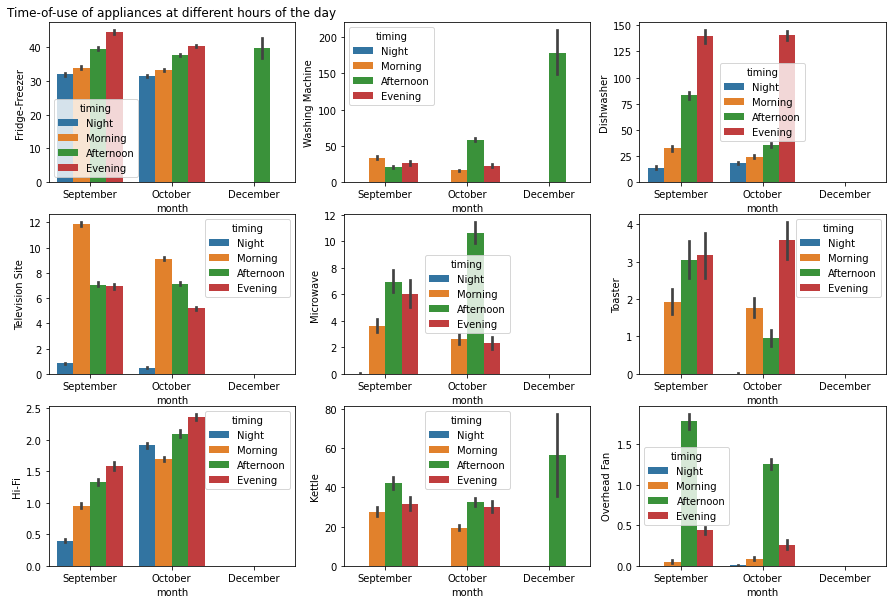

In [17]:
#after we successfully extract consumption on monthly basis, let's explore time-of-use of appliances at different hours of the day (timing)

plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
sns.barplot(x=df['month'], y=df['Fridge-Freezer'], hue = df['timing'])
plt.title("Time-of-use of appliances at different hours of the day")
plt.subplot(3,3,2)
sns.barplot(x=df['month'], y=df['Washing Machine'], hue = df['timing'])
plt.subplot(3,3,3)
sns.barplot(x=df['month'], y=df['Dishwasher'], hue = df['timing'])
plt.subplot(3,3,4)
sns.barplot(x=df['month'], y=df['Television Site'], hue = df['timing'])
plt.subplot(3,3,5)
sns.barplot(x=df['month'], y=df['Microwave'], hue = df['timing'])
plt.subplot(3,3,6)
sns.barplot(x=df['month'], y=df['Toaster'], hue = df['timing'])
plt.subplot(3,3,7)
sns.barplot(x=df['month'], y=df['Hi-Fi'], hue = df['timing'])
plt.subplot(3,3,8)
sns.barplot(x=df['month'], y=df['Kettle'], hue = df['timing'])
plt.subplot(3,3,9)
sns.barplot(x=df['month'], y=df['Overhead Fan'], hue = df['timing'])



In [18]:
#Comparison of various appliances consumptions

dx= df.drop(["Month","Aggregate","Year","timing","month","Day","Hour","Minute"], axis=1) #dropping features that arent required for comparison
dy=dx.describe() #describe the new table
dy

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
count,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000
mean,35.509772,21.637725,48.534603,5.832907,3.713427,1.518560,1.590277,20.477056,0.427638
std,45.337155,193.706782,311.842492,15.350397,64.432395,37.737607,5.416394,234.841950,5.201527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1647.000000,2571.000000,2358.000000,62.000000,1251.000000,2048.000000,576.000000,2905.000000,672.000000


In [19]:
dy.iloc[1] #placing the mean consumption by appliances

Fridge-Freezer     35.509772
Washing Machine    21.637725
Dishwasher         48.534603
Television Site     5.832907
Microwave           3.713427
Toaster             1.518560
Hi-Fi               1.590277
Kettle             20.477056
Overhead Fan        0.427638
Name: mean, dtype: float64

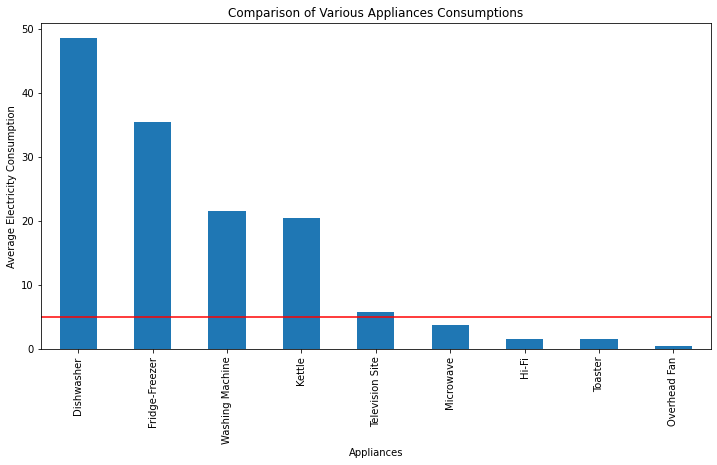

In [20]:
#compare values
fig=dx.mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
fig.axhline(y=5, color='red') #redline on consumption below 5 units to identify lower energy consuming appliances (rare categories)
plt.xlabel('Appliances')
plt.ylabel('Average Electricity Consumption')
plt.title("Comparison of Various Appliances Consumptions")
plt.show()

In [21]:
#On the average, Dishwasher consumed the largest amount of energy while the Overhead Fan consumed the least
#Microwave, Hi-Fi, Toaster and Overhead fan each consumed lower than 5 units of the total energy consumption of the period studied

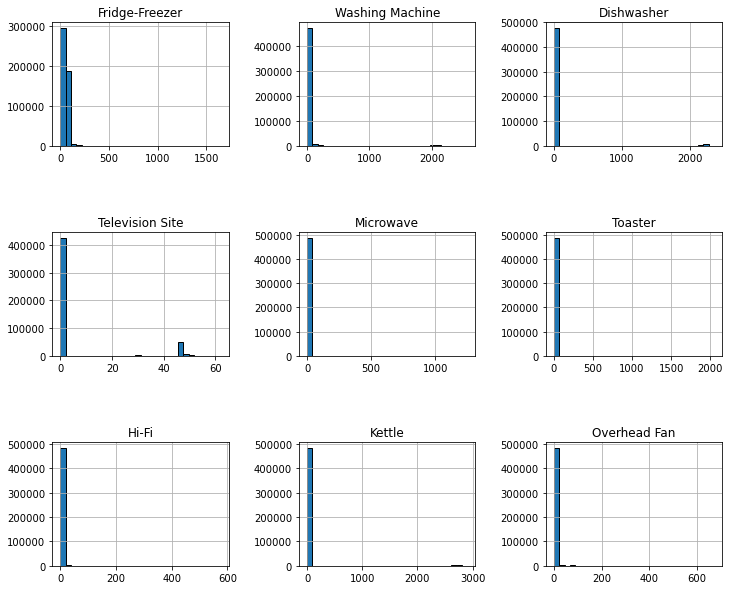

In [22]:
#check the distribution variable for all appliances
dx.hist(figsize=(12,10), bins=30, edgecolor ='black')
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [23]:
#Herein, Fridge-Freezer and Overhead Fan shall be studied for outliers
#Let's capture the two appliances:
dz=dx.loc[:,['Fridge-Freezer', 'Overhead Fan']]
dz

,Fridge-Freezer,Overhead Fan
0,88,0
1,88,0
2,88,0
3,88,0
4,88,0
...,...,...
487246,1,0
487247,1,0
487248,1,0
487249,1,0


In [24]:
dz.describe()

,Fridge-Freezer,Overhead Fan
count,487251.000000,487251.000000
mean,35.509772,0.427638
std,45.337155,5.201527
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,84.000000,0.000000
max,1647.000000,672.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overhead Fan'>

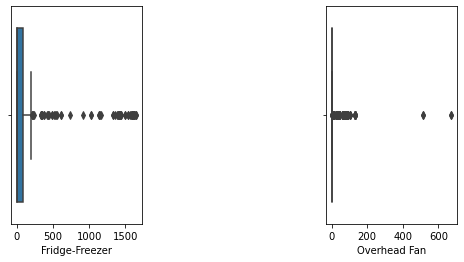

In [25]:
#Let's make a boxplot of the Fridge_Freezer and Overhead variable to visualize outliers:
plt.figure(figsize = (8,4))
plt.subplot(1,3,1)
sns.boxplot(dz['Fridge-Freezer'])
plt.subplot(1,3,3)
sns.boxplot(dz['Overhead Fan'])

In [26]:
#The outliers are the asterisks sitting outside the whiskers, 
#which delimit the inter-quartile range proximity rule boundaries.

In [28]:
#Let's create a function to find the boundaries of a variable distribution, 
#using the inter-quartile range proximity rule:
def find_boundaries(dz, variable, distance):

    IQR = dz[variable].quantile(0.75) - dz[variable].quantile(0.25)

    lower_boundary = dz[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = dz[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [29]:
#Fistly, let's use the function to determine the limits of the Toaster variable:
Fridge_upper_boundary, Fridge_lower_boundary = find_boundaries(dz, 'Fridge-Freezer', 1.5)
Fridge_upper_boundary, Fridge_lower_boundary

(208.5, -123.5)

In [30]:
#further, we create a Boolean vector to flag the outliers in Fridge-Freezer:
outliers_Fridge = np.where(dx['Fridge-Freezer'] > Fridge_upper_boundary, True, 
                    np.where(dx['Fridge-Freezer'] < Fridge_lower_boundary, True, 
                    False))
outliers_Fridge

array([False, False, False, ..., False, False, False])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fridge-Freezer'>

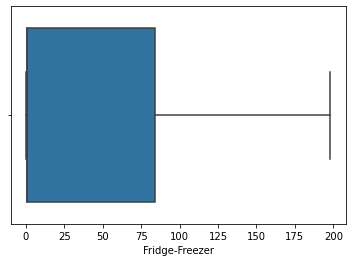

In [31]:
#then, we remove the outliers from the dataset:
Fridge_trimmed = dz.loc[~(outliers_Fridge)]
sns.boxplot(Fridge_trimmed['Fridge-Freezer'])

In [32]:
#Secondly, let's use the function to determine the limits of the Overhead variable:
Fan_upper_boundary, Fan_lower_boundary = find_boundaries(dx, 'Overhead Fan', 1.5)
Fan_upper_boundary, Fan_lower_boundary

(0.0, 0.0)

In [33]:
#further, we create a Boolean vector to flag the outliers in Overhead Fan:
outliers_Fan = np.where(dx['Overhead Fan'] > Fan_upper_boundary, True, 
                    np.where(dx['Overhead Fan'] < Fan_lower_boundary, True, 
                    False))
outliers_Fan

array([False, False, False, ..., False, False, False])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overhead Fan'>

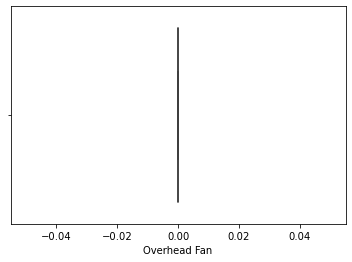

In [34]:
#then, we remove the outliers from the dataset:
Fan_trimmed = dz.loc[~(outliers_Fan)]
sns.boxplot(Fan_trimmed['Overhead Fan'])

# USAGE

In [35]:
#Implement an analysis that tells the customer when his/her usage falls under the following categories: Low, Medium or High

dv = df.loc[:,['Aggregate']]
dv

,Aggregate
0,695
1,694
2,694
3,702
4,700
...,...
487246,355
487247,358
487248,322
487249,280


In [37]:
dv.loc[dv['Aggregate']<= 1800, 'Usage'] = 'Low' #when consuption falls below 1800kWh
dv.loc[dv['Aggregate']> 4300, 'Usage'] = 'High'  #consumption above 4300kWh
dv.fillna('Medium', inplace = True)       #Consumption that falls between the Low and High Usage
dv

,Aggregate,Usage
0,695,Low
1,694,Low
2,694,Low
3,702,Low
4,700,Low
...,...,...
487246,355,Low
487247,358,Low
487248,322,Low
487249,280,Low


In [38]:
#There are instances when the usage was low, medium and high
#Let's look at the number of time such observations were made
dv.groupby('Usage').size()

Usage
High        3517
Low       461842
Medium     21892
dtype: int64

# Model

In [39]:
#Building a machine learning predictive model for the client household to predict future electricity use from Fridge-Freezer base on the datetime features.

In [40]:
dj=dm.loc[:,['Date', 'Aggregate', 'Fridge-Freezer']]
dj

,Date,Aggregate,Fridge-Freezer
0,17/09/2013,695,88
1,17/09/2013,694,88
2,17/09/2013,694,88
3,17/09/2013,702,88
4,17/09/2013,700,88
...,...,...,...
1008348,10/04/2014,115,1
1008349,10/04/2014,115,1
1008350,10/04/2014,116,1
1008351,10/04/2014,116,1


In [41]:
dj.columns = dj.columns.str.replace('Fridge-Freezer', 'Fridge_Freezer')
dj

,Date,Aggregate,Fridge_Freezer
0,17/09/2013,695,88
1,17/09/2013,694,88
2,17/09/2013,694,88
3,17/09/2013,702,88
4,17/09/2013,700,88
...,...,...,...
1008348,10/04/2014,115,1
1008349,10/04/2014,115,1
1008350,10/04/2014,116,1
1008351,10/04/2014,116,1


In [42]:
dj['Date'] = pd.to_datetime(dj['Date'], format = "%d/%m/%Y")
dj

,Date,Aggregate,Fridge_Freezer
0,2013-09-17,695,88
1,2013-09-17,694,88
2,2013-09-17,694,88
3,2013-09-17,702,88
4,2013-09-17,700,88
...,...,...,...
1008348,2014-04-10,115,1
1008349,2014-04-10,115,1
1008350,2014-04-10,116,1
1008351,2014-04-10,116,1


In [43]:
dj[~dj.Date.dt.year.isin([2014,2015])]

,Date,Aggregate,Fridge_Freezer
0,2013-09-17,695,88
1,2013-09-17,694,88
2,2013-09-17,694,88
3,2013-09-17,702,88
4,2013-09-17,700,88
...,...,...,...
487246,2013-12-26,355,1
487247,2013-12-26,358,1
487248,2013-12-26,322,1
487249,2013-12-26,280,1


In [44]:
dj = dj.iloc[0:300000]
dj

,Date,Aggregate,Fridge_Freezer
0,2013-09-17,695,88
1,2013-09-17,694,88
2,2013-09-17,694,88
3,2013-09-17,702,88
4,2013-09-17,700,88
...,...,...,...
299995,2013-10-10,73,1
299996,2013-10-10,73,1
299997,2013-10-10,73,1
299998,2013-10-10,71,1


In [45]:
#DATA SPLITTING

In [94]:
def create_split_features(dj, target_variable):
    """
    Creates time series features from datetime index
    Sepearte the target variable
    Use train_test_split() in order to create training and validation datasets.
    
    Returns:
        X (int): Extracted values from datetime index, dataframe
        y (int): Values of target variable, numpy array of integers
    """
    dj['date'] = dj.index
    dj['day'] = dj['Date'].dt.day
    dj['month'] = dj['Date'].dt.month
    
    
    X = dj[['day','month', 'Aggregate']]
    
    if target_variable:
        y = dj[target_variable]
    
    # split the full data 80:20 into training:valid sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=101)

    return X_train,X_valid,y_train,y_valid

In [95]:
X_train, X_valid, y_train, y_valid = create_split_features(dj,target_variable="Fridge_Freezer")

C:\Users\Admin\AppData\Local\Temp\ipykernel_10504\764634038.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj['date'] = dj.index
C:\Users\Admin\AppData\Local\Temp\ipykernel_10504\764634038.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj['day'] = dj['Date'].dt.day
C:\Users\Admin\AppData\Local\Temp\ipykernel_10504\764634038.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [96]:
X_train

,day,month,Aggregate
9963,18,9,130
188248,1,10,62
195115,1,10,217
171116,30,9,202
36631,20,9,66
...,...,...,...
55293,21,9,228
136767,27,9,205
204614,2,10,58
214539,3,10,292


In [97]:
y_train

9963        5
188248      1
195115     86
171116     85
36631       1
         ... 
55293      81
136767    167
204614      1
214539     86
176991      1
Name: Fridge_Freezer, Length: 240000, dtype: int64

In [98]:
# Split data again
# Note that 0.875*0.8 = 0.7 so the final effect of these two splits is to have 
#the original data split into training/validation/test sets in a 70:20:10 ratio.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=101)  

In [99]:
print("TRAIN SET:", len(X_train), "VALIDATION SET:", len(X_valid), "TEST SET:", len(X_test))

TRAIN SET: 210000 VALIDATION SET: 60000 TEST SET: 30000


In [100]:
# Set up a function to encode according to the input provided using one-hot encoding
def encoding(dj):
    enc = pd.get_dummies(dj, drop_first=True) #this will encode the "promo" feature
    return enc

In [101]:
#Apply encoding function
X_train = encoding(X_train)

In [102]:
X_train

,day,month,Aggregate
283105,8,10,254
213466,3,10,60
149590,28,9,205
18785,19,9,234
108015,25,9,2447
...,...,...,...
112611,25,9,111
11428,18,9,429
251793,6,10,64
156152,29,9,580


In [103]:
X_valid = encoding(X_valid)

In [104]:
X_test = encoding(X_test)

In [105]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [106]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [107]:
#Convert the NumPy arrays into dataframes just to use for correlation analysis:
variables = ['day','month', 'Aggregate']
X_train_scaled_dj = pd.DataFrame(X_train_scaled, columns = variables)
X_valid_scaled_dj = pd.DataFrame(X_valid_scaled, columns = variables)
X_test_scaled_dj = pd.DataFrame(X_test_scaled, columns = variables)

<AxesSubplot:>

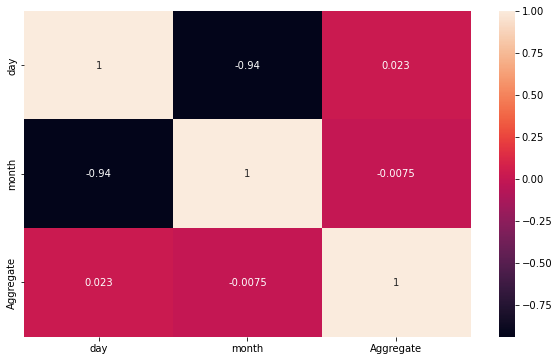

In [108]:
# Create a correlation matrix for the dataframe
corr = X_train_scaled_dj.corr()
#Create a heatmap to visualize correlation between the features
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(corr, annot = True)

In [109]:
#Get a new sets of scaled features
scaler = RobustScaler()
scaler.fit(X_train_scaled_dj)

X_train_scaled = scaler.transform(X_train_scaled_dj)
X_valid_scaled = scaler.transform(X_valid_scaled_dj)
X_test_scaled = scaler.transform(X_test_scaled_dj)


In [110]:
X_train_scaled.shape

(210000, 3)

In [111]:
dj_plot = dj.copy()

In [112]:
dj_plot.columns = dj_plot.columns.str.replace(' ', '_')

In [113]:
dj_plot

,Date,Aggregate,Fridge_Freezer,date,day,month
0,2013-09-17,695,88,0,17,9
1,2013-09-17,694,88,1,17,9
2,2013-09-17,694,88,2,17,9
3,2013-09-17,702,88,3,17,9
4,2013-09-17,700,88,4,17,9
...,...,...,...,...,...,...
299995,2013-10-10,73,1,299995,10,10
299996,2013-10-10,73,1,299996,10,10
299997,2013-10-10,73,1,299997,10,10
299998,2013-10-10,71,1,299998,10,10


In [114]:
dj_plot.set_index('Date', inplace=True) #set date as index

Text(0.5, 1.0, 'Fridge-Freezer')

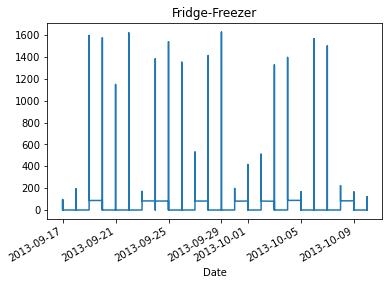

In [115]:

dj_plot.Fridge_Freezer.plot()
plt.title("Fridge-Freezer")

In [116]:
# define the model
model = LinearRegression()
#fit the model (We got error here, beacuse the target has missing values)
model.fit(X_train_scaled, y_train)

LinearRegression()

# LR

Aggregate    0.412470
day          8.211931
month        8.410525
dtype: float64


<AxesSubplot:title={'center':'Top Important Drivers of Energy Consumption by Fridge_Freezer Using Linear Regression'}>

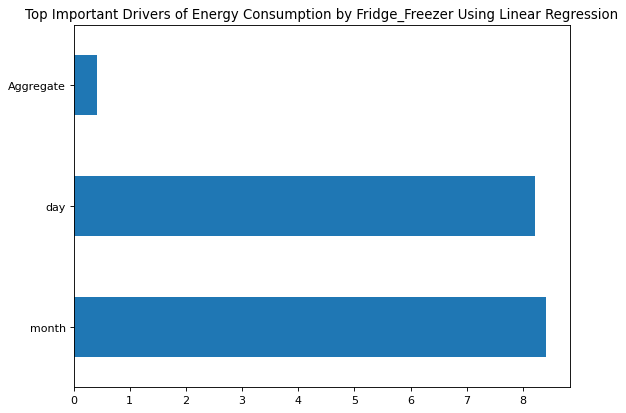

In [117]:
# define the model
model = LinearRegression()
# fit the model (I used validation data here because the train data(y_train) need to be fixed)
model.fit(X_valid_scaled, y_valid)
# get importance
importance = model.coef_
# summarize feature importance
predictors = X_valid_scaled_dj.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Energy Consumption by Fridge_Freezer Using Linear Regression")

feat_importances = pd.Series(model.coef_, index= X_valid_scaled_dj.columns)

feat_importances.nlargest(6).plot(kind='barh')

In [118]:
#Predict the missing values in y_train and save as y_train_pred
y_train_pred = model.predict(X_train)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [119]:
#Put the prediction in a dataframe now called ypred (just for checks)
ypred = pd.DataFrame(y_train_pred ,columns=['New_y_train'])
ypred

,New_y_train
0,288.877935
1,167.799084
2,424.494988
3,362.549245
4,1324.617131
...,...
209995,361.087008
209996,434.768981
209997,194.084757
209998,587.383201


In [120]:
#No missing value in the target (y_train/ypred) again
ypred.isnull().sum()

New_y_train    0
dtype: int64

In [121]:
#Predict the missing values in y_test and save as y_test_pred
y_test_pred = model.predict(X_test_scaled)

# Decision Tree

month        0.000748
day          0.036842
Aggregate    0.962410
dtype: float64


<AxesSubplot:title={'center':'Top Important Drivers of Energy Consumption by Fridge_Freezer Using Decision Tree'}>

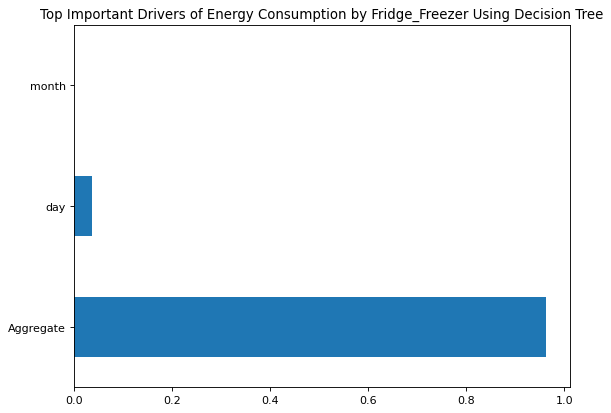

In [122]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train_scaled, y_train_pred)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_dj.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Energy Consumption by Fridge_Freezer Using Decision Tree")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_dj.columns)

feat_importances.nlargest(6).plot(kind='barh')

# Random Forest

day          0.004910
month        0.032657
Aggregate    0.962433
dtype: float64


<AxesSubplot:title={'center':'Top Important Drivers of Energy Consumption by Fridge_Freezer Using Random Forest'}>

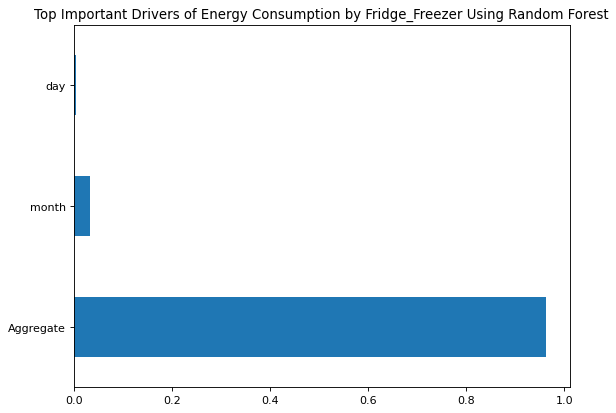

In [123]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train_pred)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_dj.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Energy Consumption by Fridge_Freezer Using Random Forest")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_dj.columns)

feat_importances.nlargest(6).plot(kind='barh')

# XGBR

month        0.00000
day          0.06016
Aggregate    0.93984
dtype: float32


<AxesSubplot:title={'center':'Top Important Drivers of Energy Consumption by Fridge_Freezer Using XGBoost'}>

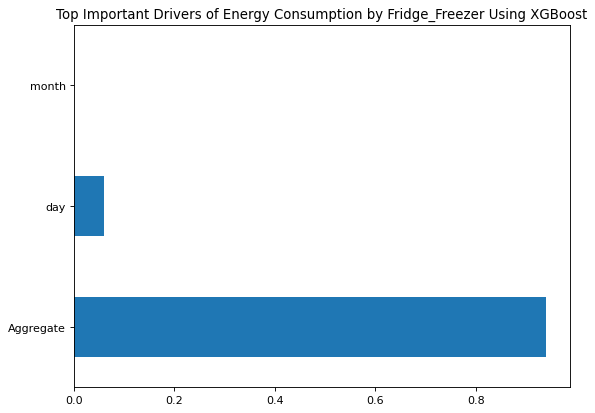

In [124]:
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train_scaled, y_train_pred)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_dj.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Energy Consumption by Fridge_Freezer Using XGBoost")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_dj.columns)

feat_importances.nlargest(6).plot(kind='barh')

In [125]:
X_train_scaled_dj.drop(['month'], axis=1, inplace=True)
X_train_scaled_dj

,day,Aggregate
0,-0.631579,0.685535
1,-0.894737,-0.534591
2,0.421053,0.377358
3,-0.052632,0.559748
4,0.263158,14.477987
...,...,...
209995,0.263158,-0.213836
209996,-0.105263,1.786164
209997,-0.736842,-0.509434
209998,0.473684,2.735849


In [126]:
X_test_scaled_dj.drop(['month'], axis=1, inplace=True)
X_test_scaled_dj

,day,Aggregate
0,0.421053,-0.540881
1,-0.631579,1.163522
2,0.526316,-0.496855
3,-0.789474,0.188679
4,-0.947368,0.194969
...,...,...
29995,0.368421,-0.100629
29996,0.368421,-0.534591
29997,0.052632,-0.515723
29998,-0.789474,0.031447


In [127]:
X_valid_scaled_dj.drop(['month'], axis=1, inplace=True)
X_valid_scaled_dj

,day,Aggregate
0,-0.105263,-0.496855
1,0.000000,1.100629
2,0.210526,-0.188679
3,-0.052632,-0.534591
4,0.210526,0.465409
...,...,...
59995,0.052632,-0.534591
59996,-0.947368,0.289308
59997,-0.789474,-0.402516
59998,0.000000,-0.037736


In [128]:
#Re-Scale the adjusted data above
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [129]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [130]:
#Shape has not reduced even after we removed "month"
X_train_scaled.shape

(210000, 3)

In [131]:
X_train_scaled_dj.shape

(210000, 2)

In [132]:
y_train_pred.shape

(210000,)

In [133]:
y_valid.shape

(60000,)

In [134]:
y_test_pred.shape

(30000,)

In [135]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use trainning data to train the estimator
linear_regression.fit(X_train_scaled_dj, y_train_pred)

LinearRegression()

In [136]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred1 = linear_regression.predict(X_test_scaled_dj) # Test

print('Test r2 score: ', r2_score(y_pred1, y_test_pred))

test_mse1 = mean_squared_error(y_pred1, y_test_pred)

test_rmse1 = np.sqrt(test_mse1)

print('Test RMSE: %.2f' % test_rmse1)

Test r2 score:  -0.6902792453622131
Test RMSE: 567.08


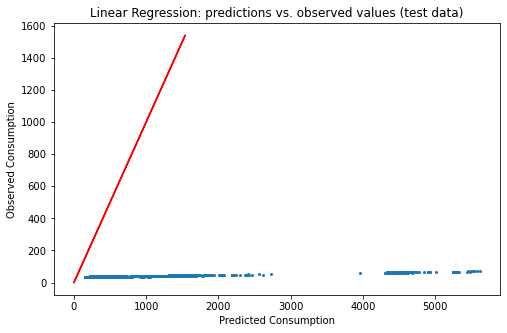

In [137]:
#Evaluate the Performance of our Predictive Model (Linear Regression)
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(linear_regression.predict(X_test_scaled_dj), y_test_pred, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Linear Regression: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Consumption')
ax.set_ylabel('Observed Consumption');

In [138]:
# 1. Import the estimator object (model)
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn.fit(X_train_scaled_dj, y_train_pred)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, weights='distance')

In [139]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred2 = knn.predict(X_test_scaled_dj) # Test

print('Test r2 score: ', r2_score(y_pred2, y_test_pred))

test_mse2 = mean_squared_error(y_pred2, y_test_pred)

test_rmse2 = np.sqrt(test_mse2)

print('Test RMSE: %.2f' % test_rmse2)

Test r2 score:  -0.6899975411653227
Test RMSE: 567.14


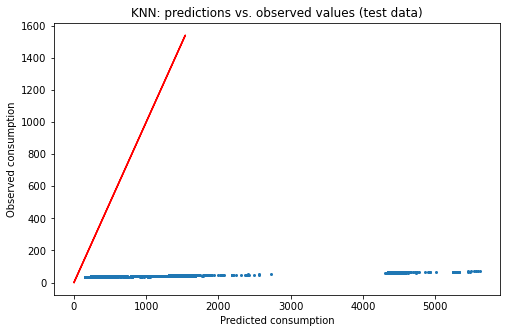

In [140]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test_scaled_dj), y_test_pred, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted consumption')
ax.set_ylabel('Observed consumption');

In [141]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
dtree = DecisionTreeRegressor(max_depth=3)
# 3. Use the trainning data to train the estimator
dtree.fit(X_train_scaled_dj, y_train_pred)

DecisionTreeRegressor(max_depth=3)

In [142]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred3 = dtree.predict(X_test_scaled_dj) # Test

print('Test r2 score: ', r2_score(y_pred3, y_test_pred))

test_mse3 = mean_squared_error(y_pred3, y_test_pred)

test_rmse3 = np.sqrt(test_mse3)

print('Test RMSE: %.2f' % test_rmse3)

Test r2 score:  -0.7070486099675004
Test RMSE: 563.90


In [143]:
from sklearn.ensemble import RandomForestRegressor
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
rf = RandomForestRegressor(max_depth=3) #Notice here also we are using here "random forest regressor" not "random forest classifier"
# 3. Use the trainning data to train the estimator
rf.fit(X_train_scaled_dj, y_train_pred)

RandomForestRegressor(max_depth=3)

In [144]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred4 = rf.predict(X_test_scaled_dj) # Test

print('Test r2 score: ', r2_score(y_pred4, y_test_pred))

test_mse4 = mean_squared_error(y_pred4, y_test_pred)

test_rmse4 = np.sqrt(test_mse4)

print('Test RMSE: %.2f' % test_rmse4)

Test r2 score:  -0.7072395597828129
Test RMSE: 563.81


In [145]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled_dj, y_train_pred, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [146]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred5 = xgb_model.predict(X_test_scaled_dj) # Test

print('Test r2 score: ', r2_score(y_pred5, y_test_pred))

test_mse5 = mean_squared_error(y_pred5, y_test_pred)

test_rmse5 = np.sqrt(test_mse5)

print('Test RMSE: %.2f' % test_rmse5)

Test r2 score:  -0.6899545373819325
Test RMSE: 567.17


In [147]:
#Training Multiple Models Using Python Functions

In [148]:
# Get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LinearRegression()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['rf'] = RandomForestRegressor()
    models['svm'] = SVR()
    models['xgb'] = XGBRegressor() 
    return models

In [149]:
# Fit Models on training data
def fit_model(model, X, y):
    model.fit(X, y)
    return model

In [150]:
# evaluate models using validation data
def evaluate_model_valid(model,X,y):
    pred = model.predict(X)
    scores = r2_score(pred, y)
    return scores

In [151]:
# evaluate models using test data
def evaluate_model_test(model,X,y):
    pred = model.predict(X)
    scores = r2_score(pred, y)
    return scores

In [152]:
# evaluate models using cross-validation
def evaluate_model_cv(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [153]:
#See Different Evaluation Metrics in Scikit-Learn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [ ]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    level0.append(('rf', RandomForestRegressor()))
    
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# get a list of models to evaluate
def stack_models():
    models = dict()
    models['lr'] = LinearRegression()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['rf'] = RandomForestRegressor()
    models['stacking'] = get_stacking()
    return models
 
# evaluate a give model using cross-validation
def stack_evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

# get the models to evaluate
models = stack_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = stack_evaluate_model(model, X_train_scaled_dj,y_train_pred)
    results.append(scores)
    names.append(name)
    print('%s %.3f' % (name, mean(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

lr 1.000
knn 1.000
